In [2]:
from keras.datasets import imdb

(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000) 
# num_words 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개를 사용하겠다는 의미이다.
# 적절한 크기의 벡터 데이터를 얻을 수 있음.
 

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]
# negative = 0 / positive = 1  

1

In [5]:
max([max(sequence) for sequence in train_data])
# index is 9,999 / num_words = 10,000

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key , value) in word_index.items()]
)

decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)


1646592/1641221 [==============================] - 0s 0us/step


In [7]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # all zero 

    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
# change train data to vector
x_test = vectorize_sequences(test_data)
# change test data to vector 

x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics 
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs= 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5303 - binary_accuracy: 0.7855 - val_loss: 0.4116 - val_binary_accuracy: 0.8677
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3301 - binary_accuracy: 0.9028 - val_loss: 0.3269 - val_binary_accuracy: 0.8810
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2429 - binary_accuracy: 0.9265 - val_loss: 0.2866 - val_binary_accuracy: 0.8904
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1908 - binary_accuracy: 0.9406 - val_loss: 0.2803 - val_binary_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1560 - binary_accuracy: 0.9510 - val_loss: 0.2891 - val_binary_accuracy: 0.8851
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1282 - binary_accuracy: 0.9619 - val_loss: 0.2943 - val_binary_

In [13]:
history_dict = history.history

In [14]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

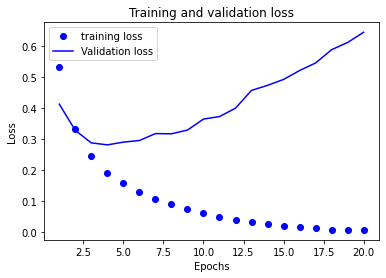

In [15]:
# add graph / add prediction 

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)


plt.plot(epochs,loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
result = model.evaluate(x_test,y_test)
result

#accuracy : 85% 

25000/25000 [==============================] - 2s 78us/step


[0.6997141731595993, 0.8508800268173218]

In [21]:
model.predict(x_test)

array([[0.01199913],
       [0.99999917],
       [0.9974355 ],
       ...,
       [0.01257846],
       [0.02372041],
       [0.6990753 ]], dtype=float32)